In [7]:
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt
from scipy import stats
import pylab

## آمار توصیفی سوال دوم

In [9]:
# champion team season 2022-23

conn = sqlite3.connect('../db/main.db')

champ2022_23 = pd.read_sql('''
                 SELECT c.season, c.champion, p.id, p.name, p.career_length, p.height
                 FROM champions c 
                 JOIN roster_data rd on c.Champion = rd.team_name 
                 JOIN players p on rd.player_id = p.id
                 WHERE c.season = "2022-23" AND rd.season = "2022-23" AND p.is_active=True ;
                 ''', conn)
# champ2022_23

In [10]:
# champion team season 2023-24

conn = sqlite3.connect('../db/main.db')

champ2023_24 = pd.read_sql('''
                 SELECT c.season, c.champion, p.id, p.name, p.career_length, p.height
                 FROM champions c 
                 JOIN roster_data rd on c.Champion = rd.team_name 
                 JOIN players p on rd.player_id = p.id
                 WHERE c.season = "2023-24" AND rd.season = "2023-24" AND p.is_active=True;
                 ''', conn)
# champ2023_24

In [11]:
# champion team season 2022-23 & 2023-24

champ2022_24 = pd.concat([champ2022_23, champ2023_24], ignore_index=True)
# champ2022_24

In [14]:
# top 15 players for season 2022-23

conn = sqlite3.connect('../db/main.db')

top15_2022_23 = pd.read_sql('''
                           SELECT pe.player_id, p.name, pe.season, pe.rank, pe.points, p.career_length, p.height 
                           FROM player_evaluations pe 
                           JOIN players p on pe.player_id = p.id 
                           WHERE season = "2022-2023" and rank <= 15;
                           ''', conn)
# top15_2022_23

In [15]:
# top 15 players for season 2023-24

conn = sqlite3.connect('../db/main.db')

top15_2023_24 = pd.read_sql('''
                           SELECT pe.player_id, p.name, pe.season, pe.rank, pe.points, p.career_length, p.height 
                           FROM player_evaluations pe 
                           JOIN players p on pe.player_id = p.id 
                           WHERE season = "2023-2024" and rank <= 15;
                           ''', conn)
# top15_2023_24

In [16]:
# top 15 players for season 2022-23 & 2023-24

top15_2022_24 = pd.concat([top15_2022_23, top15_2023_24], ignore_index=True)
# top15_2022_24

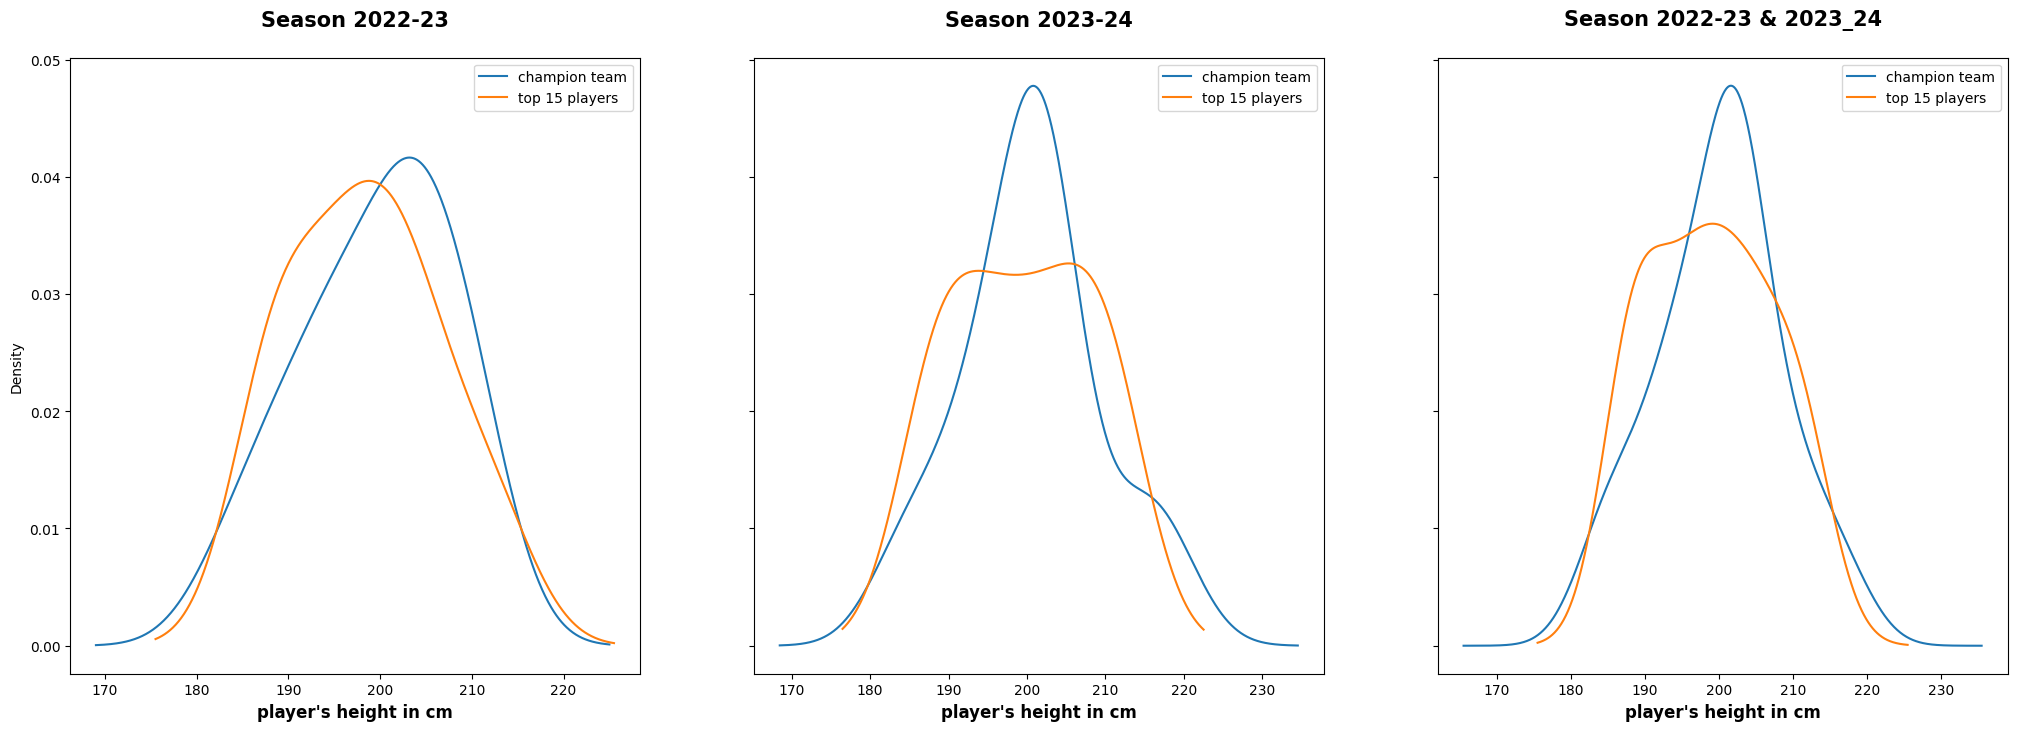

In [17]:
fig, axes = plt.subplots(1, 3, figsize = (25,8), sharey=True)

champ2022_23['height'].plot(kind='kde', ax=axes[0], label='champion team')
top15_2022_23['height'].plot(kind='kde',ax=axes[0], label='top 15 players')

champ2023_24['height'].plot(kind='kde', ax=axes[1], label='champion team')
top15_2023_24['height'].plot(kind='kde',ax=axes[1], label='top 15 players')

champ2022_24['height'].plot(kind='kde', ax=axes[2], label='champion team')
top15_2022_24['height'].plot(kind='kde',ax=axes[2], label='top 15 players')



axes[0].set_title('Season 2022-23\n', fontweight='bold', fontsize=15)
axes[0].set_xlabel('player\'s height in cm', fontweight='bold', fontsize= 12)

axes[1].set_title('Season 2023-24\n', fontweight='bold', fontsize=15)
axes[1].set_xlabel('player\'s height in cm', fontweight='bold', fontsize= 12)
axes[2].set_title('Season 2022-23 & 2023_24\n', fontweight='bold', fontsize=15)
axes[2].set_xlabel('player\'s height in cm', fontweight='bold', fontsize= 12)

for ax in axes:
    ax.legend()



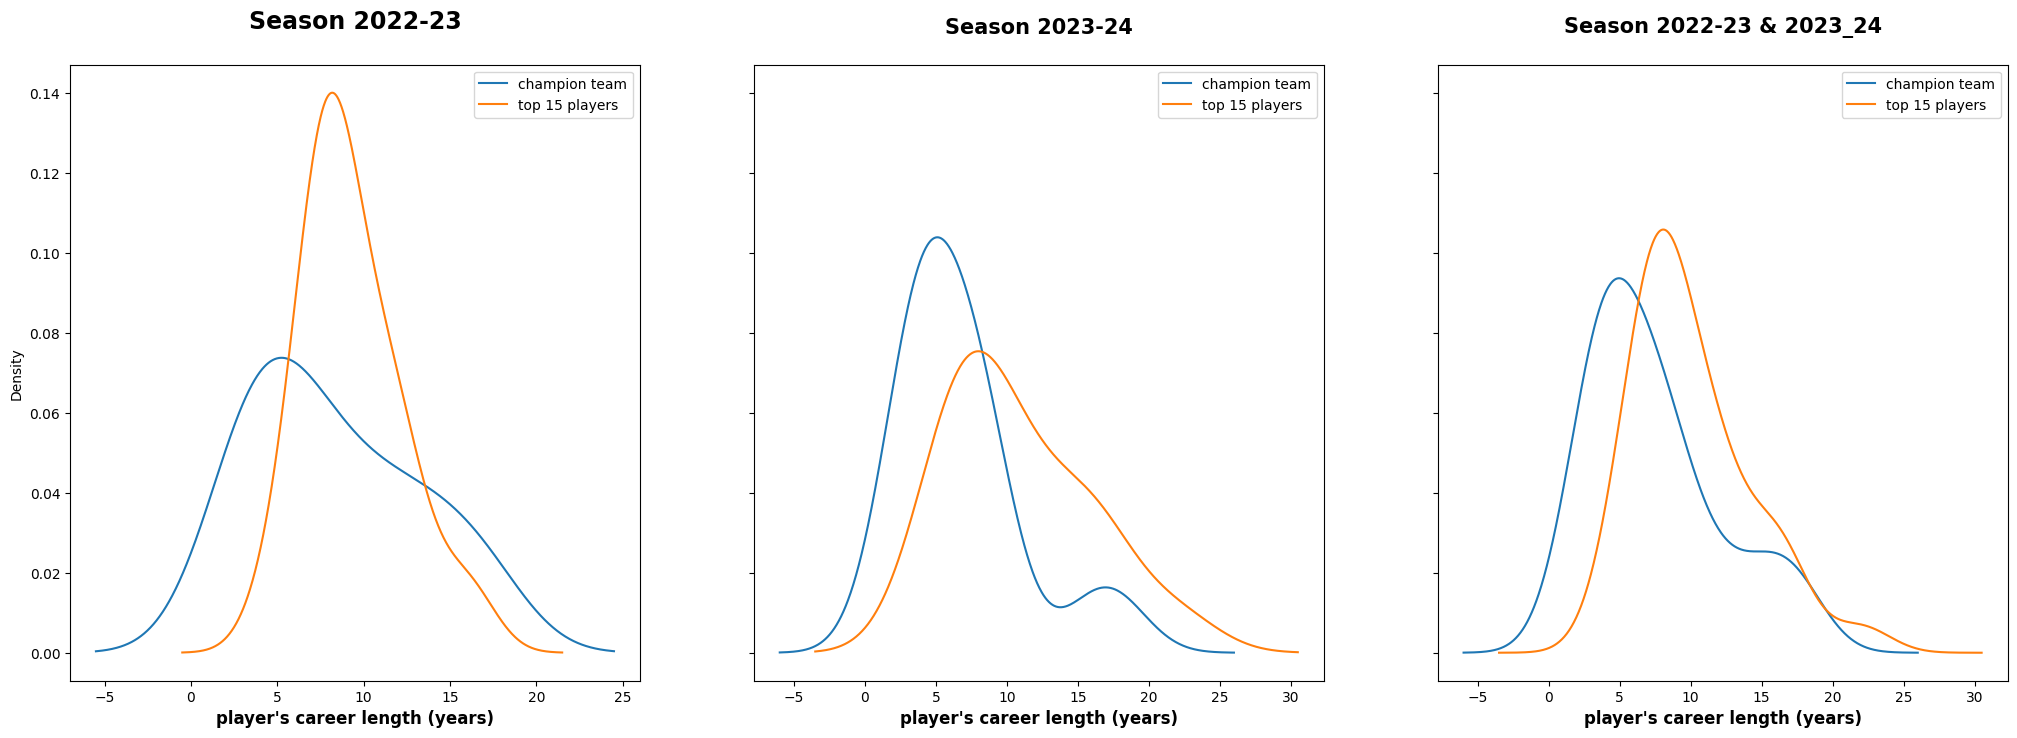

In [18]:

fig, axes = plt.subplots(1, 3, figsize = (25,8), sharey=True)

champ2022_23['career_length'].plot(kind='kde', ax=axes[0], label='champion team')
top15_2022_23['career_length'].plot(kind='kde',ax=axes[0], label='top 15 players')

champ2023_24['career_length'].plot(kind='kde', ax=axes[1], label='champion team')
top15_2023_24['career_length'].plot(kind='kde',ax=axes[1], label='top 15 players')

champ2022_24['career_length'].plot(kind='kde', ax=axes[2], label='champion team')
top15_2022_24['career_length'].plot(kind='kde',ax=axes[2], label='top 15 players')



axes[0].set_title('Season 2022-23\n', fontweight='bold', fontsize=17)
axes[0].set_xlabel('player\'s career length (years)', fontweight='bold', fontsize= 12)
axes[1].set_title('Season 2023-24\n', fontweight='bold', fontsize=15)
axes[1].set_xlabel('player\'s career length (years)', fontweight='bold', fontsize= 12)
axes[2].set_title('Season 2022-23 & 2023_24\n', fontweight='bold', fontsize=15)
axes[2].set_xlabel('player\'s career length (years)', fontweight='bold', fontsize= 12)

for ax in axes:
    ax.legend()


## آزمون فرض سوال اول

In [21]:

conn = sqlite3.connect('../db/main.db')

top20_2022_24 = pd.read_sql('''
                 SELECT pe.season, p.id, p.name, p.weight, p.height, pe.rank
                 FROM player_evaluations pe
                 JOIN players p on pe.player_id = p.id
                 WHERE (season = "2023-2024" OR season = "2022-2023") AND rank <=20;
                 ''', conn)

top20_2022_24['height_to_weight'] = top20_2022_24['height'] / top20_2022_24['weight']
# top20_2022_24
print(top20_2022_24['height_to_weight'].mean())
print(top20_2022_24['height_to_weight'].std())


2.0317745670445495
0.2042781892499472


In [22]:

conn = sqlite3.connect('../db/main.db')

top20_2020_22 = pd.read_sql('''
                 SELECT pe.season, p.id, p.name, p.weight, p.height, pe.rank
                 FROM player_evaluations pe
                 JOIN players p on pe.player_id = p.id
                 WHERE (season = "2020-2021" OR season = "2021-2022") AND rank <=20;
                 ''', conn)

top20_2020_22['height_to_weight'] = top20_2020_22['height'] / top20_2020_22['weight']
# top20_2020_22
print(top20_2020_22['height_to_weight'].mean())
print(top20_2020_22['height_to_weight'].std())

2.035052863804237
0.24648688382153908


### Check Normality

In [34]:
# Function to check normality with Shapiro test:

def normality_check(list_of_series):
    results = []
    for i in range(len(list_of_series)):
        normality = True
        statistic, p_value = stats.shapiro(list_of_series[i])
        if p_value < 0.05:
            normality = False
        results.append(normality)    
    return results

In [35]:
normality_check([top20_2020_22['height_to_weight'], top20_2022_24['height_to_weight']])

[True, True]

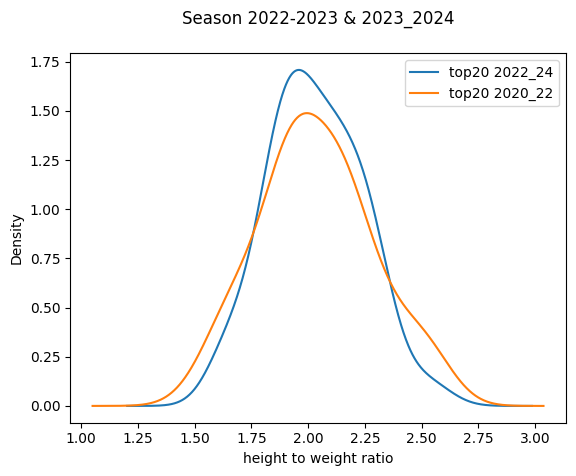

In [26]:
top20_2022_24['height_to_weight'].plot(kind='kde', label='top20 2022_24')
top20_2020_22['height_to_weight'].plot(kind='kde',label='top20 2020_22')

plt.title('Season 2022-2023 & 2023_2024\n')
plt.xlabel('height to weight ratio')
plt.legend()
plt.show()

In [ ]:
# Function to draw QQPlot to test normality

def qqplot(list_of_series):
    
    fig, axes = plt.subplots(1, len(list_of_series), figsize=(12, 4), sharey=True)
    
    for i in range(len(list_of_series)):
        stats.probplot(list_of_series[i], dist='norm', plot=axes[i])
        
    plt.show()

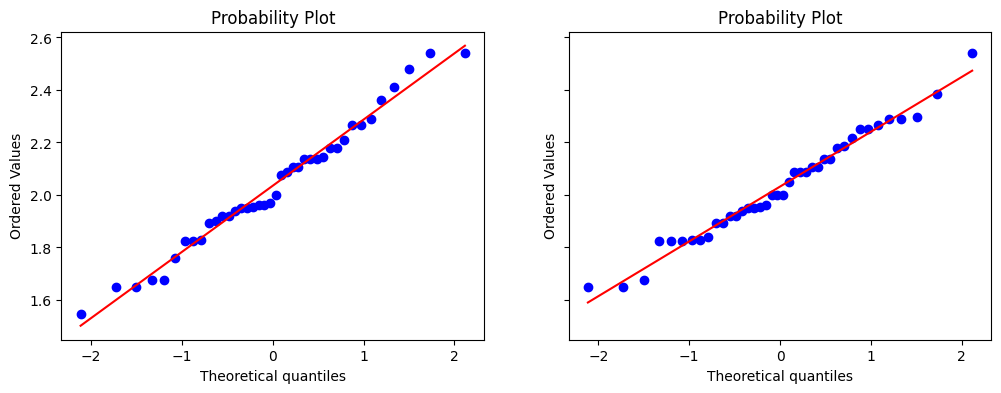

In [ ]:
# QQPlot to test normality

qqplot([top20_2020_22['height_to_weight'], top20_2022_24['height_to_weight']])

### Test the hypothesis

In [29]:
t_statistics, p_value = stats.ttest_ind(top20_2020_22['height_to_weight'], top20_2022_24['height_to_weight'], equal_var=False)

print(f'p_value = {p_value:.4f}')

p_value = 0.9485
